# Exercise 3

We generate the same noisy dataset as last time:

In [1]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


## Plotting the data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

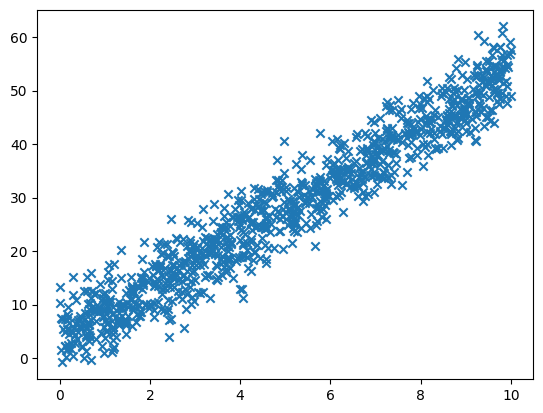

In [4]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Setup code

We add an additional column for the bias to the dataset (as per usual):

In [5]:
X_ = np.c_[X, np.ones((X.shape[0]))]

We initialize a weight matrix with random values:

In [6]:
num_samples = X_.shape[0]
num_features = X_.shape[1]

np.random.seed(42)
initial_weights = (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)

Here is again the code to load the data in chunks / batches:

In [7]:
from math import ceil

BATCH_SIZE = 100
NUM_BATCHES = int(ceil(float(num_samples)/BATCH_SIZE))

def Loader():
    # This generates the batches, one after another
    # For a large dataset, we could load data from disk here
    for i in range(NUM_BATCHES):
        # Get the i'th slice of data
        batch_X = X_[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        batch_y = y[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        yield batch_X, batch_y

## Tasks
You can find an implementation of stochastic gradient descent in the `exerscise3_sgd.ipynb` notebook.

Your task in this exercise is to adjust the code by implementing other optimizers:
 - SGD with a momentum of 0.3 (add the momentum term to the existing code)
 - SGD with Nesterov momentum of 0.3 (change the code to use nesterov momentum)
 - Adagrad with a learning rate of 0.1 and $\epsilon=10^{-10}$
 - RMSprop with a learning rate of 0.01, $\rho=0.99$ and $\epsilon=10^{-8}$
 - Adadelta with a learning rate of 1, $\rho=0.9$ and $\epsilon=10^{-6}$
 - Adam with a learning rate of 0.01, $\beta_1=0.9$, $\beta_2=0.999$ and $\epsilon=10^{-8}$

For that, save a copy of this file for each individual optimizer. Adapt the code for the optimizer to implement. The last cell of the notebook writes the loss values of each epoch to a file, which can then be loaded and visualized using the `exercise3_optimizers_comparison.ipynb` notebook. Adjust the value of the `optimizer_name` and `optimizer_count` variables below for each optimizer that you implement, so that the loss curves are not overwritten by the different notebooks.

PS: Of course, implement the optimizers manually and do not just use `torch.optim.*` classes, that would defeat the purpose ;-)
You can use `torch.optim.*` classes as a reference of what the correct result would be, or you can just compare your results to the image in `exercise3_optimizers_comparison.ipynb`, which shows the correct results (the same that you would obtain from using the pytorch optimizers).

Epoch 1, Loss: 520.5317
Epoch 100, Loss: 15.1445
Epoch 200, Loss: 14.9835
Epoch 300, Loss: 14.9450


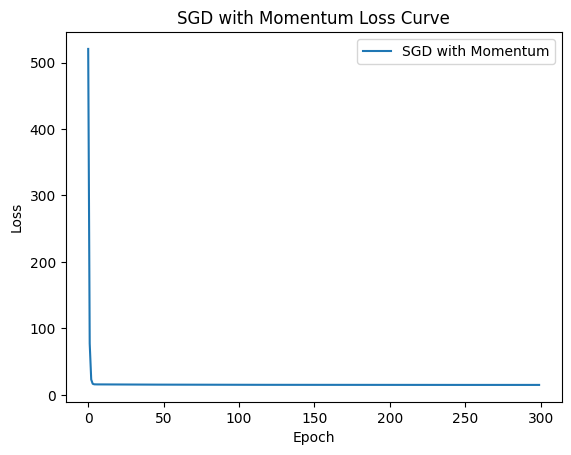

In [8]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from math import ceil


# Parameters
LR = 0.001
MOMENTUM = 0.3

# Initialize weights and velocity
np.random.seed(42)
weights = (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)
velocity = np.zeros_like(weights)

# Loss storage
losses = []

# SGD with Momentum
for epoch in range(1, 301):
    total_loss = 0
    for batch_X, batch_y in Loader():
        # Forward pass
        prediction = batch_X @ weights
        error = batch_y - prediction
        loss = np.square(error).mean()

        # Backward pass (Gradient)
        gradient = -2.0 / batch_X.shape[0] * batch_X.T @ error

        # Update velocity and weights
        velocity = MOMENTUM * velocity - LR * gradient
        weights += velocity

        # Accumulate loss
        total_loss += loss * batch_X.shape[0]

    # Average loss for the epoch
    epoch_loss = total_loss / num_samples
    losses.append(epoch_loss)

    # Print progress
    if epoch == 1 or epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}")

# Plot loss curve
plt.plot(losses, label="SGD with Momentum")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("SGD with Momentum Loss Curve")
plt.show()

# Save results
with open("momentum.pickle", "wb") as f:
    pickle.dump(losses, f)


Epoch 1, Loss: 430.8143
Epoch 100, Loss: 15.2938
Epoch 200, Loss: 15.0203
Epoch 300, Loss: 14.9549


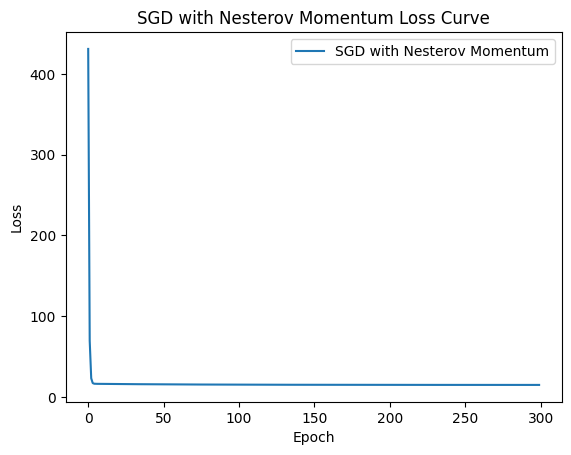

In [9]:
# SGD with Nesterov Momentum Parameters
MOMENTUM = 0.3  # Momentum coefficient
LR = 0.001  # Learning rate

# Reinitialize weights and velocity
weights = (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)
velocity = np.zeros_like(weights)

# Loss storage
losses = []

# SGD with Nesterov Momentum
for epoch in range(1, 301):
    total_loss = 0
    for batch_X, batch_y in Loader():
        # Compute lookahead weights
        lookahead_weights = weights + MOMENTUM * velocity

        # Compute prediction at lookahead position
        prediction = batch_X @ lookahead_weights
        error = batch_y - prediction
        loss = np.square(error).mean()

        # Compute gradient at the lookahead position
        gradient = -2.0 / batch_X.shape[0] * batch_X.T @ error

        # Update velocity and weights
        velocity = MOMENTUM * velocity - LR * gradient
        weights += velocity

        # Accumulate loss
        total_loss += loss * batch_X.shape[0]

    # Average loss for the epoch
    epoch_loss = total_loss / num_samples
    losses.append(epoch_loss)

    # Print progress
    if epoch == 1 or epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}")

# Plot loss curve
plt.plot(losses, label="SGD with Nesterov Momentum")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("SGD with Nesterov Momentum Loss Curve")
plt.show()

# Save results
with open("nesterov.pickle", "wb") as f:
    pickle.dump(losses, f)


Epoch 1, Loss: 1091.4975
Epoch 100, Loss: 45.3763
Epoch 200, Loss: 17.2063
Epoch 300, Loss: 15.4538


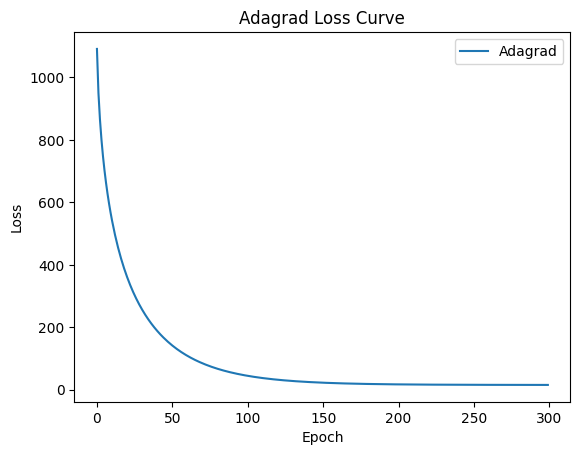

In [10]:
# Adagrad Parameters
LR = 0.1  # Learning rate
EPSILON = 1e-10  # Small constant to prevent division by zero

# Reinitialize weights and gradient history
weights = (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)
gradient_history = np.zeros_like(weights)

# Loss storage
losses = []

# Adagrad Implementation
for epoch in range(1, 301):
    total_loss = 0
    for batch_X, batch_y in Loader():
        # Forward pass
        prediction = batch_X @ weights
        error = batch_y - prediction
        loss = np.square(error).mean()

        # Gradient computation
        gradient = -2.0 / batch_X.shape[0] * batch_X.T @ error

        # Accumulate squared gradients
        gradient_history += gradient ** 2

        # Update weights using Adagrad formula
        weights -= (LR / (np.sqrt(gradient_history) + EPSILON)) * gradient

        # Accumulate loss
        total_loss += loss * batch_X.shape[0]

    # Average loss for the epoch
    epoch_loss = total_loss / num_samples
    losses.append(epoch_loss)

    # Print progress
    if epoch == 1 or epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}")

# Plot loss curve
plt.plot(losses, label="Adagrad")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Adagrad Loss Curve")
plt.show()

# Save results
with open("adagrad.pickle", "wb") as f:
    pickle.dump(losses, f)


Epoch 1, Loss: 1084.7768
Epoch 100, Loss: 15.3437
Epoch 200, Loss: 14.9439
Epoch 300, Loss: 14.9439


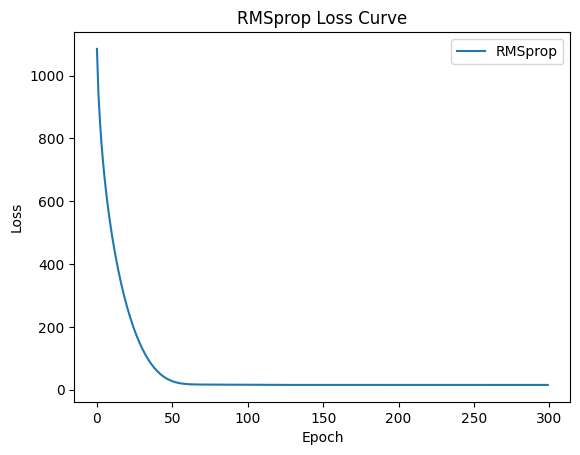

In [11]:
# RMSprop Parameters
LR = 0.01  # Learning rate
RHO = 0.99  # Decay rate for the moving average
EPSILON = 1e-8  # Small constant to prevent division by zero

# Reinitialize weights and squared gradient average
weights = (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)
squared_gradient_avg = np.zeros_like(weights)

# Loss storage
losses = []

# RMSprop Implementation
for epoch in range(1, 301):
    total_loss = 0
    for batch_X, batch_y in Loader():
        # Forward pass
        prediction = batch_X @ weights
        error = batch_y - prediction
        loss = np.square(error).mean()

        # Gradient computation
        gradient = -2.0 / batch_X.shape[0] * batch_X.T @ error

        # Update moving average of squared gradients
        squared_gradient_avg = RHO * squared_gradient_avg + (1 - RHO) * gradient ** 2

        # Update weights using RMSprop formula
        weights -= (LR / (np.sqrt(squared_gradient_avg) + EPSILON)) * gradient

        # Accumulate loss
        total_loss += loss * batch_X.shape[0]

    # Average loss for the epoch
    epoch_loss = total_loss / num_samples
    losses.append(epoch_loss)

    # Print progress
    if epoch == 1 or epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}")

# Plot loss curve
plt.plot(losses, label="RMSprop")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("RMSprop Loss Curve")
plt.show()

# Save results
with open("rmsprop.pickle", "wb") as f:
    pickle.dump(losses, f)


Epoch 1, Loss: 928.9529
Epoch 100, Loss: 16.8312
Epoch 200, Loss: 14.9530
Epoch 300, Loss: 14.9310


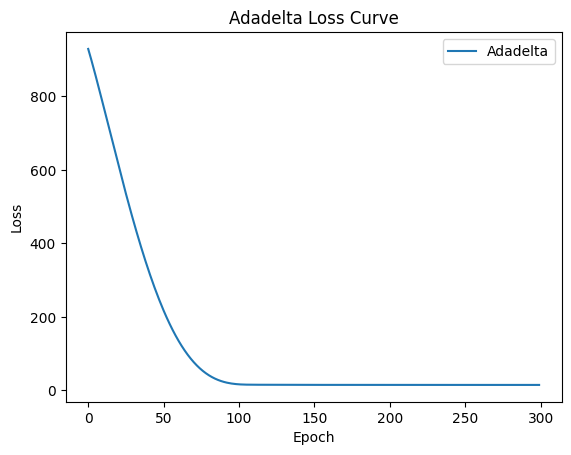

In [12]:
# Adadelta Parameters
RHO = 0.9  # Decay rate for the moving averages
EPSILON = 1e-6  # Small constant to prevent division by zero

# Reinitialize weights and moving averages
weights = (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)
squared_gradient_avg = np.zeros_like(weights)
squared_update_avg = np.zeros_like(weights)

# Loss storage
losses = []

# Adadelta Implementation
for epoch in range(1, 301):
    total_loss = 0
    for batch_X, batch_y in Loader():
        # Forward pass
        prediction = batch_X @ weights
        error = batch_y - prediction
        loss = np.square(error).mean()

        # Gradient computation
        gradient = -2.0 / batch_X.shape[0] * batch_X.T @ error

        # Update moving average of squared gradients
        squared_gradient_avg = RHO * squared_gradient_avg + (1 - RHO) * gradient ** 2

        # Compute parameter update step
        update_step = (
            -np.sqrt(squared_update_avg + EPSILON)
            / np.sqrt(squared_gradient_avg + EPSILON)
        ) * gradient

        # Update moving average of squared updates
        squared_update_avg = RHO * squared_update_avg + (1 - RHO) * update_step ** 2

        # Update weights
        weights += update_step

        # Accumulate loss
        total_loss += loss * batch_X.shape[0]

    # Average loss for the epoch
    epoch_loss = total_loss / num_samples
    losses.append(epoch_loss)

    # Print progress
    if epoch == 1 or epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}")

# Plot loss curve
plt.plot(losses, label="Adadelta")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Adadelta Loss Curve")
plt.show()

# Save results
with open("adadelta.pickle", "wb") as f:
    pickle.dump(losses, f)


Epoch 1, Loss: 1188.7225
Epoch 100, Loss: 151.7542
Epoch 200, Loss: 19.2769
Epoch 300, Loss: 16.0745


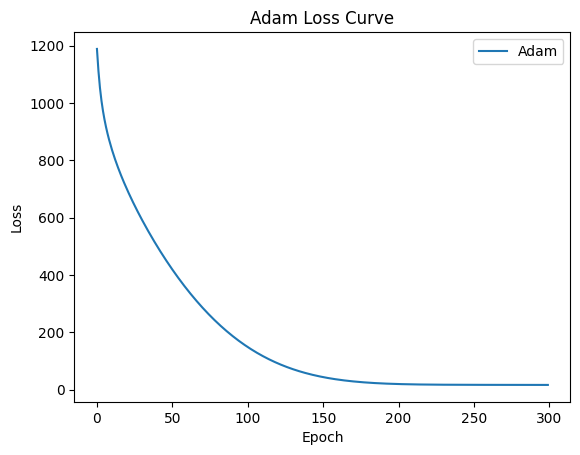

In [13]:
# Adam Parameters
LR = 0.01  # Learning rate
BETA_1 = 0.9  # Decay rate for the first moment
BETA_2 = 0.999  # Decay rate for the second moment
EPSILON = 1e-8  # Small constant to prevent division by zero

# Reinitialize weights and moments
weights = (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)
m = np.zeros_like(weights)  # First moment
v = np.zeros_like(weights)  # Second moment

# Loss storage
losses = []

# Adam Implementation
for epoch in range(1, 301):
    total_loss = 0
    for batch_X, batch_y in Loader():
        # Forward pass
        prediction = batch_X @ weights
        error = batch_y - prediction
        loss = np.square(error).mean()

        # Gradient computation
        gradient = -2.0 / batch_X.shape[0] * batch_X.T @ error

        # Update moments
        m = BETA_1 * m + (1 - BETA_1) * gradient
        v = BETA_2 * v + (1 - BETA_2) * gradient ** 2

        # Bias correction
        m_hat = m / (1 - BETA_1 ** epoch)
        v_hat = v / (1 - BETA_2 ** epoch)

        # Update weights using Adam formula
        weights -= (LR / (np.sqrt(v_hat) + EPSILON)) * m_hat

        # Accumulate loss
        total_loss += loss * batch_X.shape[0]

    # Average loss for the epoch
    epoch_loss = total_loss / num_samples
    losses.append(epoch_loss)

    # Print progress
    if epoch == 1 or epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}")

# Plot loss curve
plt.plot(losses, label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Adam Loss Curve")
plt.show()

# Save results
with open("adam.pickle", "wb") as f:
    pickle.dump(losses, f)


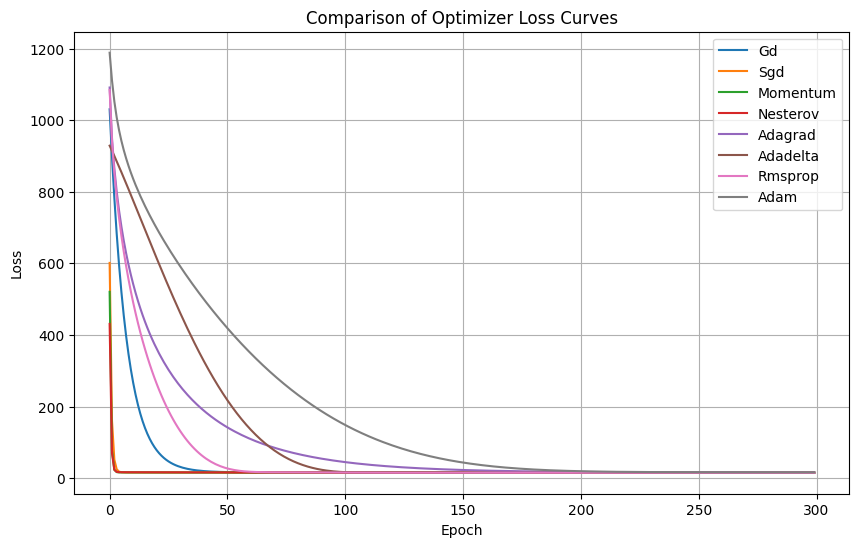

In [14]:
import pickle
import matplotlib.pyplot as plt

# Load loss data from saved files
optimizer_names = ["gd","sgd", "momentum", "nesterov", "adagrad", "adadelta","rmsprop", "adam"]
loss_curves = {}

for optimizer in optimizer_names:
    filename = f"{optimizer}.pickle"
    with open(filename, "rb") as f:
        loss_curves[optimizer] = pickle.load(f)

# Plot all loss curves
plt.figure(figsize=(10, 6))
for optimizer, losses in loss_curves.items():
    plt.plot(losses, label=optimizer.capitalize())

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Comparison of Optimizer Loss Curves")
plt.legend()
plt.grid(True)
plt.show()
